In [35]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


%matplotlib inline

In [62]:
data=pd.read_csv('D:/product_revenue.csv')
data.head()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
0,39215.93,614,503,752186,10,10,11990,24306,20498,299
1,23819.47,833,622,425667,8,5,3992,11171,8718,571
2,4415.45,122,101,121878,2,2,1998,6926,6017,6919074
3,57435.56,239,196,609761,2,2,4998,11250,9733,2834
4,0.00,32,22,58488,0,0,0,872,764,1745628


In [5]:
data.isnull().sum()

yitemrevenue           0
xcartadd               0
xcartuniqadd           0
xcartaddtotalrs        0
xcartremove            0
xcardtremovetotal      0
xcardtremovetotalrs    0
xproductviews          0
xuniqprodview          0
xprodviewinrs          0
dtype: int64

In [7]:
data.shape

(92, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232FD37B208>]],
      dtype=object)

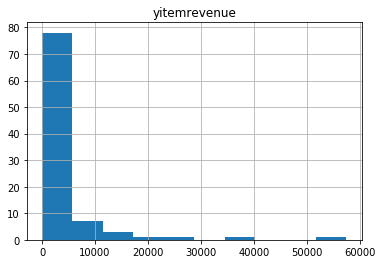

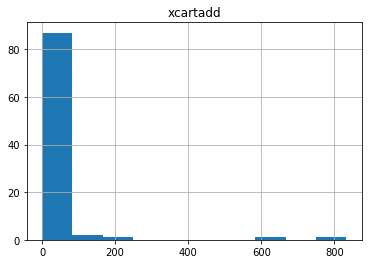

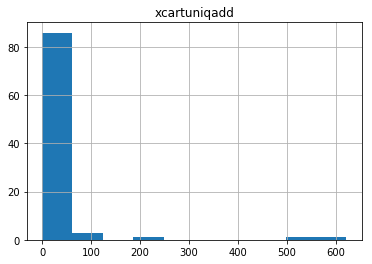

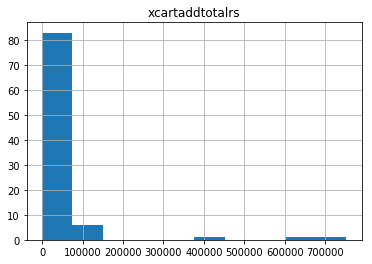

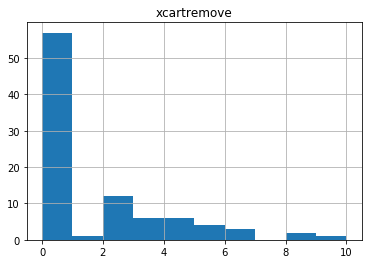

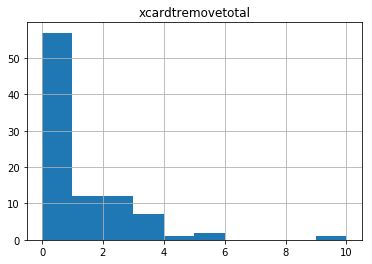

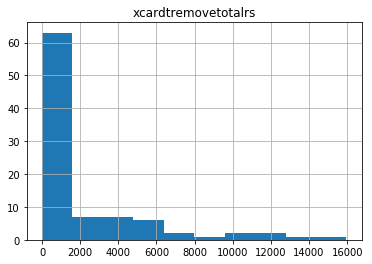

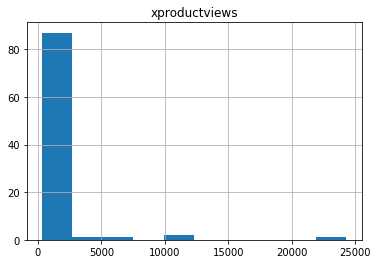

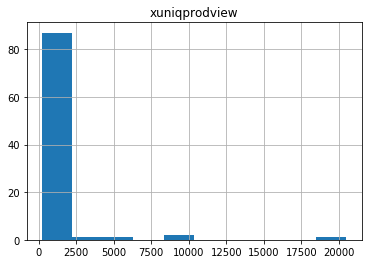

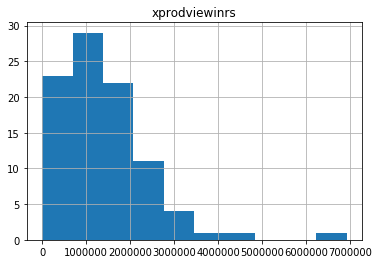

In [10]:
data.hist('yitemrevenue')
data.hist('xcartadd')
data.hist('xcartuniqadd')
data.hist('xcartaddtotalrs')
data.hist('xcartremove')
data.hist('xcardtremovetotal')
data.hist('xcardtremovetotalrs')
data.hist('xproductviews')
data.hist('xuniqprodview')
data.hist('xprodviewinrs')

In [12]:
data.describe()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,3679.082174,39.500000,30.347826,48131.826087,1.423913,0.880435,1962.402174,1331.576087,1084.891304,1.380471e+06
std,8120.313959,108.548819,84.138352,107360.991406,2.219958,1.546655,3526.679144,2951.472183,2483.228479,1.026994e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,225.000000,2.990000e+02
25%,0.000000,7.750000,6.000000,11947.500000,0.000000,0.000000,0.000000,601.000000,472.250000,6.868305e+05
50%,1166.320000,15.000000,12.000000,22673.000000,0.000000,0.000000,0.000000,766.000000,614.500000,1.224656e+06
75%,3639.675000,29.000000,22.250000,46529.500000,2.000000,1.250000,2153.500000,905.000000,746.750000,1.746880e+06
max,57435.560000,833.000000,622.000000,752186.000000,10.000000,10.000000,15960.000000,24306.000000,20498.000000,6.919074e+06


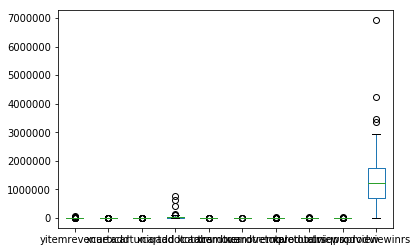

In [16]:
data.plot.box()

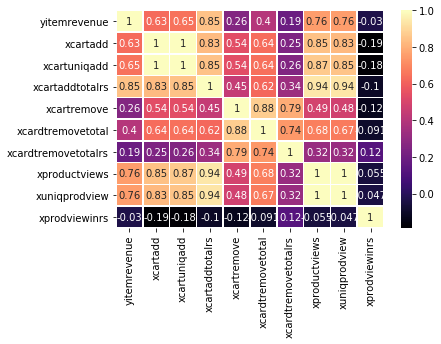

In [17]:
corr = data.corr()
df = pd.DataFrame(data.corr())
sns.heatmap(df, cmap='magma', linewidths=0.5, annot=True)
plt.show()

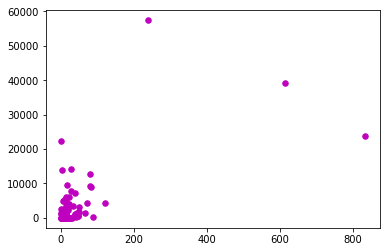

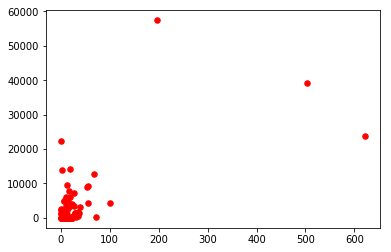

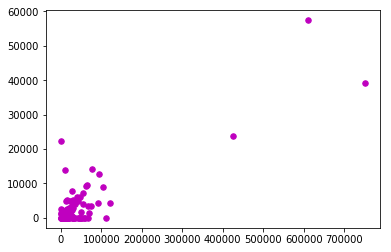

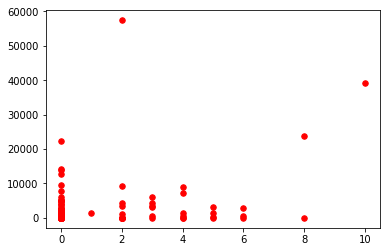

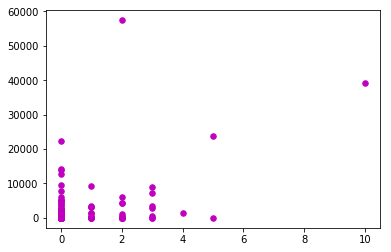

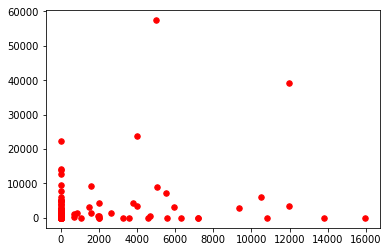

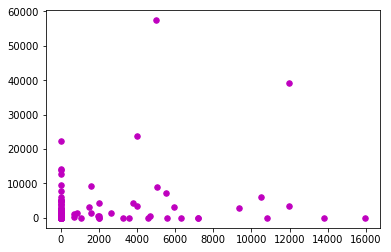

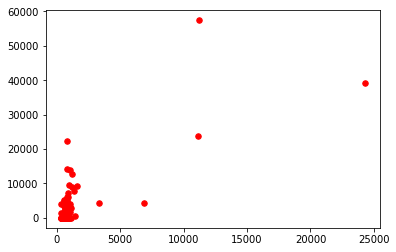

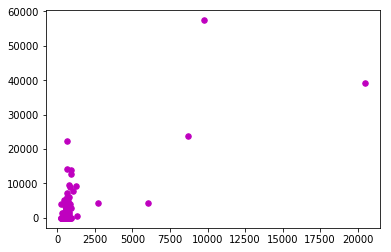

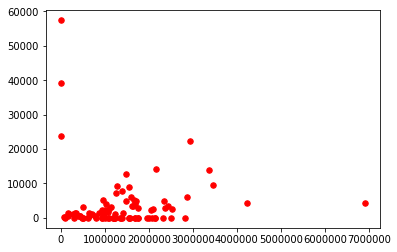

In [18]:
plt.scatter(x='xcartadd',y='yitemrevenue',data=data,color='m',marker='o',s=30)
plt.show()
plt.scatter(x='xcartuniqadd',y='yitemrevenue',data=data,color='red',marker='o',s=30)
plt.show()
plt.scatter(x='xcartaddtotalrs',y='yitemrevenue',data=data,color='m',marker='o',s=30)
plt.show()
plt.scatter(x='xcartremove',y='yitemrevenue',data=data,color='red',marker='o',s=30)
plt.show()
plt.scatter(x='xcardtremovetotal',y='yitemrevenue',data=data,color='m',marker='o',s=30)
plt.show()
plt.scatter(x='xcardtremovetotalrs',y='yitemrevenue',data=data,color='red',marker='o',s=30)
plt.show()
plt.scatter(x='xcardtremovetotalrs',y='yitemrevenue',data=data,color='m',marker='o',s=30)
plt.show()
plt.scatter(x='xproductviews',y='yitemrevenue',data=data,color='red',marker='o',s=30)
plt.show()
plt.scatter(x='xuniqprodview',y='yitemrevenue',data=data,color='m',marker='o',s=30)
plt.show()
plt.scatter(x='xprodviewinrs',y='yitemrevenue',data=data,color='red',marker='o',s=30)
plt.show()


In [22]:
data1=data[data['yitemrevenue']<10000]
data1.head()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
2,4415.45,122,101,121878,2,2,1998,6926,6017,6919074
4,0.00,32,22,58488,0,0,0,872,764,1745628
5,9181.90,79,56,63121,2,1,1598,1587,1232,1281213
6,4135.44,23,22,35857,0,0,0,1075,842,1685285
7,8906.24,82,54,104078,4,3,5036,1214,848,1554466


In [41]:
lm=smf.ols(formula='yitemrevenue~xcartadd+xcartuniqadd+xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xproductviews+xuniqprodview+xprodviewinrs',data=data).fit()
lm

In [42]:
parameter=lm.params
parameter

Intercept              -355.586874
xcartadd                 89.550275
xcartuniqadd           -161.127990
xcartaddtotalrs           0.101343
xcartremove             597.765916
xcardtremovetotal     -1096.089776
xcardtremovetotalrs      -0.291394
xproductviews             6.796759
xuniqprodview            -7.939607
xprodviewinrs             0.000549
dtype: float64

In [43]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     31.33
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           5.57e-23
Time:                        10:36:39   Log-Likelihood:                -889.68
No. Observations:                  92   AIC:                             1799.
Df Residuals:                      82   BIC:                             1825.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -355.5869    946.178     -0.376      0.708   -2237.836    1526.662
xcartadd               89.5503    115.743      0.774      0.441    -140.700     319.801
xcartuniqadd         -161.1280    158.434     -1.017      0.312    -476.303     154.047
xcartaddtotalrs         0.1013      0.013      7.549      0.000       0.075       0.128
xcartremove           597.7659    528.214      1.132      0.261    -453.021    1648.553
xcardtremovetotal   -1096.0898    796.820     -1.376      0.173   -2681.219     489.039
xcardtremovetotalrs    -0.2914      0.267     -1.090      0.279      -0.823       0.240
xproductviews           6.7968     10.047      0.676      0.501     -13.190      26.784
xuniqprodview          -7.9396     11.417     -0.695      0.489     -30.651      14.772
xprodviewinrs           0.0005      0.000      1.159      0.250      -0.000       0.001
==============================================================================
Omnibus:                       53.835   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.068
Skew:                           1.714   Prob(JB):                     1.04e-68
Kurtosis:                      11.362   Cond. No.                     4.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#check for multicolinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data1.columns
vif.round(1)

,VIF Factor,features
0,5.4,yitemrevenue
1,994.0,xcartadd
2,1112.4,xcartuniqadd
3,21.9,xcartaddtotalrs
4,9.5,xcartremove
5,11.3,xcardtremovetotal
6,6.1,xcardtremovetotalrs
7,4811.5,xproductviews
8,4333.9,xuniqprodview
9,2.0,xprodviewinrs


In [45]:
#test for heteroscedasity
test=sms.het_goldfeldquandt(lm.resid,lm.model.exog)
test

(0.2916943373907659, 0.9998175289182352, 'increasing')

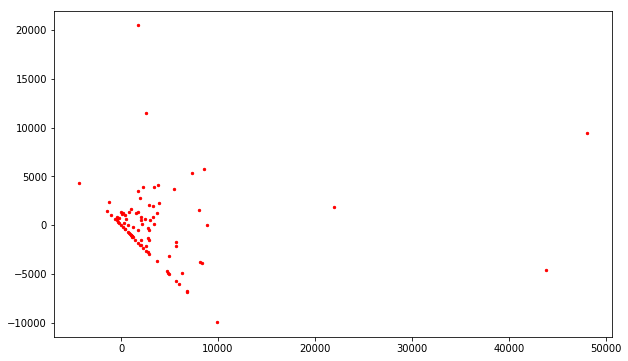

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(lm.predict(), lm.resid, s = 5.5, color='r')
plt.show()

Text(0.5,1,'Plot Residual Normality')

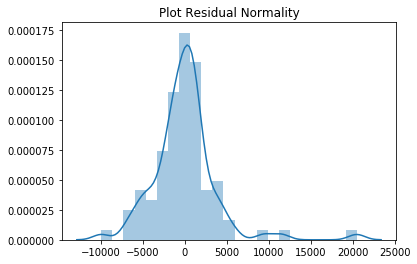

In [47]:
sns.distplot(lm.resid, hist=True)
plt.title("Plot Residual Normality")

No handles with labels found to put in legend.


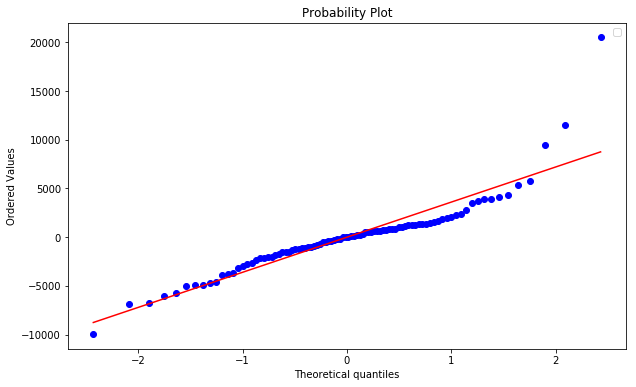

In [74]:
import pylab
import scipy.stats
plt.figure(figsize=(10,6))
scipy.stats.probplot(lm.resid, dist="norm", plot=pylab)
pylab.legend()
pylab.show()

In [75]:
lm1=smf.ols(formula='yitemrevenue~xcartadd+xcartuniqadd+xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xproductviews+xuniqprodview+xprodviewinrs',data=data1).fit()
lm1

In [49]:
parameter=lm1.params
parameter

Intercept             -753.659472
xcartadd                28.950382
xcartuniqadd           -24.046903
xcartaddtotalrs          0.000116
xcartremove           -116.590355
xcardtremovetotal     -112.032465
xcardtremovetotalrs     -0.007446
xproductviews           21.872259
xuniqprodview          -25.363312
xprodviewinrs            0.000965
dtype: float64

In [50]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     4.464
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           0.000105
Time:                        10:38:02   Log-Likelihood:                -764.84
No. Observations:                  85   AIC:                             1550.
Df Residuals:                      75   BIC:                             1574.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -753.6595    517.191     -1.457      0.149   -1783.957     276.638
xcartadd               28.9504     76.830      0.377      0.707    -124.103     182.004
xcartuniqadd          -24.0469     97.013     -0.248      0.805    -217.307     169.213
xcartaddtotalrs         0.0001      0.018      0.006      0.995      -0.036       0.036
xcartremove          -116.5904    318.481     -0.366      0.715    -751.038     517.857
xcardtremovetotal    -112.0325    425.892     -0.263      0.793    -960.453     736.388
xcardtremovetotalrs    -0.0074      0.163     -0.046      0.964      -0.332       0.317
xproductviews          21.8723      6.259      3.495      0.001       9.404      34.341
xuniqprodview         -25.3633      7.004     -3.621      0.001     -39.315     -11.411
xprodviewinrs           0.0010      0.001      1.774      0.080      -0.000       0.002
==============================================================================
Omnibus:                        5.752   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.798
Skew:                           0.635   Prob(JB):                       0.0551
Kurtosis:                       2.844   Cond. No.                     3.95e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#check for multicolinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data1.values, i) for i in range(data1.shape[1])]
vif["features"] = data1.columns
vif.round(1)

,VIF Factor,features
0,2.3,yitemrevenue
1,109.7,xcartadd
2,98.9,xcartuniqadd
3,9.3,xcartaddtotalrs
4,10.6,xcartremove
5,6.7,xcardtremovetotal
6,7.8,xcardtremovetotalrs
7,908.5,xproductviews
8,775.4,xuniqprodview
9,13.4,xprodviewinrs


In [52]:
#test for heteroscedasity
test=sms.het_goldfeldquandt(lm1.resid,lm1.model.exog)
test

(0.6732197345347913, 0.8670563057054208, 'increasing')

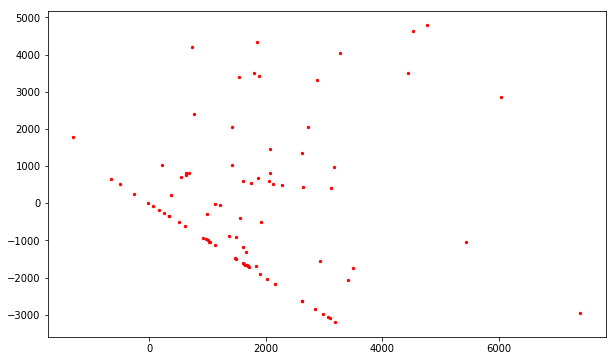

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(lm1.predict(), lm1.resid, s = 5.5, color='r')
plt.show()

Text(0.5,1,'Plot Residual Normality')

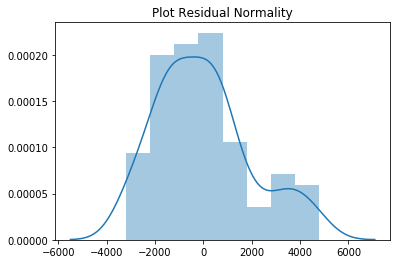

In [54]:
sns.distplot(lm1.resid, hist=True)
plt.title("Plot Residual Normality")

No handles with labels found to put in legend.


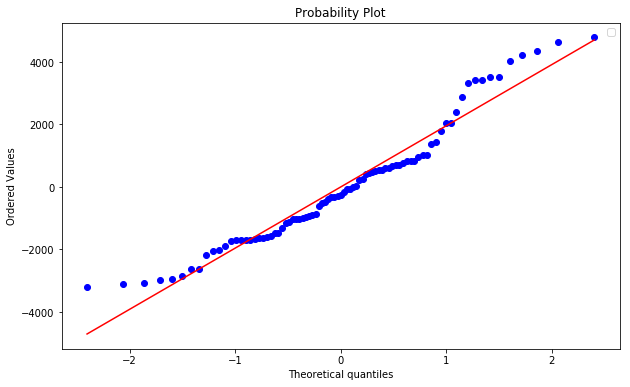

In [73]:
import pylab
import scipy.stats
plt.figure(figsize=(10,6))
scipy.stats.probplot(lm1.resid, dist="norm", plot=pylab)
pylab.legend()
pylab.show()

In [63]:
x=data.drop(['xcartadd','xcartuniqadd','xproductviews','xuniqprodview'],1)

In [64]:
#check for multicolinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,4.9,yitemrevenue
1,7.0,xcartaddtotalrs
2,7.7,xcartremove
3,8.9,xcardtremovetotal
4,4.0,xcardtremovetotalrs
5,1.4,xprodviewinrs


In [65]:
lm2=smf.ols(formula='yitemrevenue~xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xprodviewinrs',data=x).fit()
lm2

In [68]:
parameter=lm2.params
parameter

Intercept               429.434613
xcartaddtotalrs           0.075257
xcartremove             111.244318
xcardtremovetotal     -1305.733106
xcardtremovetotalrs       0.023466
xprodviewinrs             0.000415
dtype: float64

In [67]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     53.14
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           7.32e-25
Time:                        10:47:46   Log-Likelihood:                -893.44
No. Observations:                  92   AIC:                             1799.
Df Residuals:                      86   BIC:                             1814.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             429.4346    841.241      0.510      0.611   -1242.896    2101.766
xcartaddtotalrs         0.0753      0.005     13.884      0.000       0.064       0.086
xcartremove           111.2443    481.439      0.231      0.818    -845.824    1068.313
xcardtremovetotal   -1305.7331    712.962     -1.831      0.071   -2723.055     111.589
xcardtremovetotalrs     0.0235      0.221      0.106      0.916      -0.416       0.463
xprodviewinrs           0.0004      0.000      0.906      0.367      -0.000       0.001
==============================================================================
Omnibus:                       57.367   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.101
Skew:                           1.940   Prob(JB):                     1.01e-63
Kurtosis:                      10.786   Cond. No.                     3.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#test for heteroscedasity
test=sms.het_goldfeldquandt(lm2.resid,lm2.model.exog)
test

(0.24419296584376093, 0.9999900512739351, 'increasing')

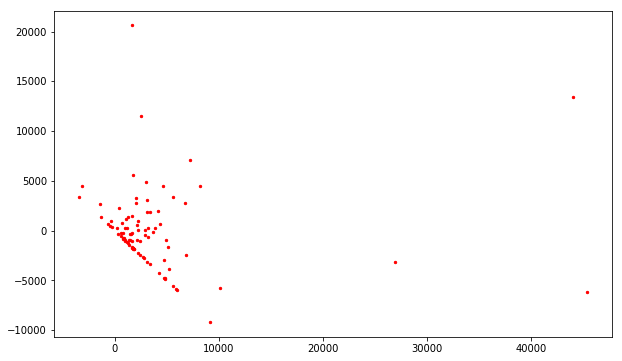

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(lm2.predict(), lm2.resid, s = 5.5, color='r')
plt.show()

Text(0.5,1,'Plot Residual Normality')

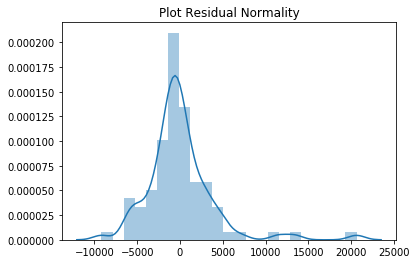

In [71]:
sns.distplot(lm2.resid, hist=True)
plt.title("Plot Residual Normality")

No handles with labels found to put in legend.


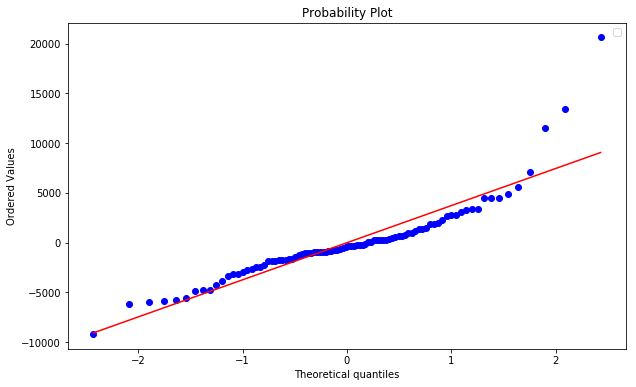

In [72]:
import pylab
import scipy.stats
plt.figure(figsize=(10,6))
scipy.stats.probplot(lm2.resid, dist="norm", plot=pylab)
pylab.legend()
pylab.show()

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(scaler.fit(x1))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [85]:
x1=x.drop('yitemrevenue',1)
y1=x['yitemrevenue']

In [100]:
x2=scaler.transform(x1)
x2

array([[ 6.59375463e+00,  3.88434373e+00,  5.92862542e+00,
         2.85893430e+00, -1.35125930e+00],
       [ 3.53577096e+00,  2.97848917e+00,  2.67812757e+00,
         5.78651732e-01, -1.35099300e+00],
       [ 6.90663011e-01,  2.60925498e-01,  7.27828866e-01,
         1.01491751e-02,  5.42257718e+00],
       [ 5.25988639e+00,  2.60925498e-01,  7.27828866e-01,
         8.65468969e-01, -1.34877741e+00],
       [ 9.69897945e-02, -6.44929061e-01, -5.72370273e-01,
        -5.59493808e-01,  3.57507532e-01],
       [ 1.40379730e-01,  2.60925498e-01,  7.77292964e-02,
        -1.03893464e-01, -9.71786325e-02],
       [-1.14958755e-01, -6.44929061e-01, -5.72370273e-01,
        -5.59493808e-01,  2.98428632e-01],
       [ 5.23958747e-01,  1.16678006e+00,  1.37792844e+00,
         8.76303020e-01,  1.70350105e-01],
       [ 4.43818951e-01, -6.44929061e-01, -5.72370273e-01,
        -5.59493808e-01,  9.23392878e-02],
       [-2.65620074e-01, -6.44929061e-01, -5.72370273e-01,
        -5.59493808e-01

In [106]:
x3.head()

,0,1,2,3,4
0,6.593755,3.884344,5.928625,2.858934,-1.351259
1,3.535771,2.978489,2.678128,0.578652,-1.350993
2,0.690663,0.260925,0.727829,0.010149,5.422577
3,5.259886,0.260925,0.727829,0.865469,-1.348777
4,0.096990,-0.644929,-0.572370,-0.559494,0.357508


In [111]:
x3=pd.DataFrame(data=x2)
y1=pd.DataFrame(data=y1)
x3.head()
result = pd.concat([y1,x3],axis=1)
result.columns = ['yitemrevenue','xcartaddtotalrs','xcartremove','xcardtremovetotal','xcardtremovetotalrs','xprodviewinrs']
result.head()

,yitemrevenue,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xprodviewinrs
0,39215.93,6.593755,3.884344,5.928625,2.858934,-1.351259
1,23819.47,3.535771,2.978489,2.678128,0.578652,-1.350993
2,4415.45,0.690663,0.260925,0.727829,0.010149,5.422577
3,57435.56,5.259886,0.260925,0.727829,0.865469,-1.348777
4,0.00,0.096990,-0.644929,-0.572370,-0.559494,0.357508


In [112]:
lm3=smf.ols(formula='yitemrevenue~xcartaddtotalrs+xcartremove+xcardtremovetotal+xcardtremovetotalrs+xprodviewinrs',data=x).fit()
lm3

In [113]:
parameter=lm3.params
parameter

Intercept               429.434613
xcartaddtotalrs           0.075257
xcartremove             111.244318
xcardtremovetotal     -1305.733106
xcardtremovetotalrs       0.023466
xprodviewinrs             0.000415
dtype: float64

In [114]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yitemrevenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     53.14
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           7.32e-25
Time:                        11:14:39   Log-Likelihood:                -893.44
No. Observations:                  92   AIC:                             1799.
Df Residuals:                      86   BIC:                             1814.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             429.4346    841.241      0.510      0.611   -1242.896    2101.766
xcartaddtotalrs         0.0753      0.005     13.884      0.000       0.064       0.086
xcartremove           111.2443    481.439      0.231      0.818    -845.824    1068.313
xcardtremovetotal   -1305.7331    712.962     -1.831      0.071   -2723.055     111.589
xcardtremovetotalrs     0.0235      0.221      0.106      0.916      -0.416       0.463
xprodviewinrs           0.0004      0.000      0.906      0.367      -0.000       0.001
==============================================================================
Omnibus:                       57.367   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.101
Skew:                           1.940   Prob(JB):                     1.01e-63
Kurtosis:                      10.786   Cond. No.                     3.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
#test for heteroscedasity
test=sms.het_goldfeldquandt(lm3.resid,lm3.model.exog)
test

(0.24419296584376093, 0.9999900512739351, 'increasing')

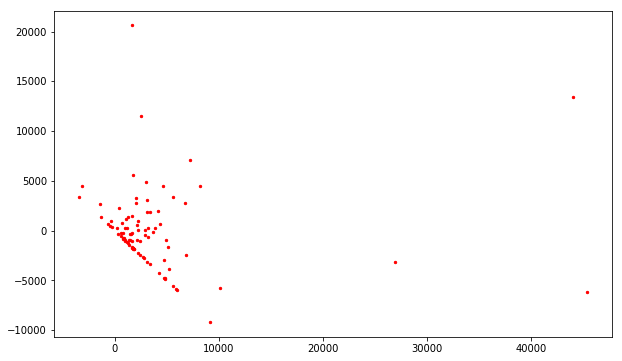

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(lm3.predict(), lm3.resid, s = 5.5, color='r')
plt.show()

Text(0.5,1,'Plot Residual Normality')

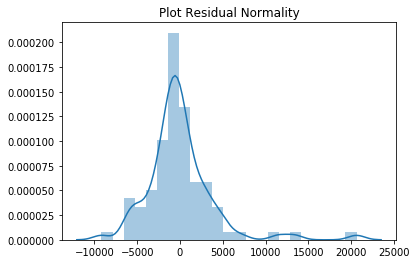

In [117]:
sns.distplot(lm3.resid, hist=True)
plt.title("Plot Residual Normality")

No handles with labels found to put in legend.


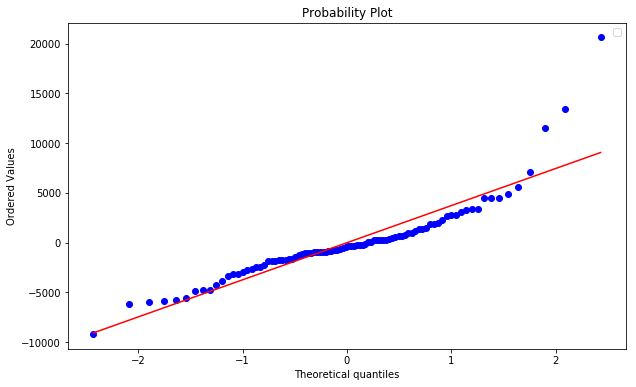

In [118]:
import pylab
import scipy.stats
plt.figure(figsize=(10,6))
scipy.stats.probplot(lm3.resid, dist="norm", plot=pylab)
pylab.legend()
pylab.show()

In [119]:
import numpy
from pyearth import Earth
from matplotlib import pyplot

In [120]:
X = data.drop(['yitemrevenue'], 1)
y = data['yitemrevenue']

In [121]:
#Fit an Earth model
model = Earth()
model.fit(X,y)

C:\Users\nikita059240\AppData\Local\Continuum\anaconda3\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\nikita059240\AppData\Local\Continuum\anaconda3\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=None,
   max_terms=None, min_search_points=None, minspan=None,
   minspan_alpha=None, penalty=None, smooth=None, thresh=None,
   use_fast=None, verbose=0, zero_tol=None)

In [122]:
print(model.summary())

Earth Model
--------------------------------------------------
Basis Function               Pruned  Coefficient  
--------------------------------------------------
(Intercept)                  No      -1670.14     
xcartaddtotalrs              Yes     None         
h(xcardtremovetotal-3)       Yes     None         
h(3-xcardtremovetotal)       Yes     None         
h(xcartaddtotalrs-46987)     Yes     None         
h(46987-xcartaddtotalrs)     Yes     None         
h(xproductviews-1115)        No      -12.1955     
h(1115-xproductviews)        Yes     None         
xprodviewinrs                Yes     None         
xcardtremovetotalrs          Yes     None         
xproductviews                Yes     None         
h(xcartaddtotalrs-70676)     No      0.160767     
h(70676-xcartaddtotalrs)     Yes     None         
xuniqprodview                Yes     None         
h(xcardtremovetotalrs-4598)  Yes     None         
h(4598-xcardtremovetotalrs)  No      0.563219     
h(xprodviewinrs-1.1

In [126]:
model.coef_

array([[-1.67013692e+03, -1.21955073e+01,  1.60767103e-01,
         5.63219430e-01,  2.25323484e-03,  9.00112987e+00]])